# Load the necessary python packages

Artcle link for more information: 

https://doi.org/10.1016/j.soildyn.2022.107662

In [2]:
#Import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Load Test Sites Data

In [5]:
# If test sites information csv format then load the CSV file into a Pandas dataframe
#df = pd.read_csv('TestSites2.csv')
# If test sites information excel format then load the excel file into a Pandas dataframe as follows
df = pd.read_excel('TestSites.xlsx')

# Extract the features
#X = df.values
X = df

In [7]:
df.head()

,IP1,IP2,IP3,IP4,IP6,IP9,IP10,IP11,IP12,IP14,IP15,IP17,IP18
0,7.62,0.250,5.5,3.5,79,2.47,61,78.3,0.96,1.02,0.99,3.0,2.770000e-07
1,6.60,0.370,2.8,1.2,35,1.90,35,162.6,0.97,1.10,1.28,1.0,1.500000e-05
2,7.60,0.640,4.7,1.1,49,1.76,4,159.3,0.97,1.10,0.97,0.6,4.000000e-05
3,6.93,0.220,4.5,3.4,72,1.77,4,93.3,0.95,1.04,1.05,2.1,3.730000e-05
4,6.54,0.174,3.9,2.7,57,2.55,85,90.1,0.95,1.06,1.08,2.6,1.580000e-07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IP1     8 non-null      float64
 1   IP2     8 non-null      float64
 2   IP3     8 non-null      float64
 3   IP4     8 non-null      float64
 4   IP6     8 non-null      int64  
 5   IP9     8 non-null      float64
 6   IP10    8 non-null      int64  
 7   IP11    8 non-null      float64
 8   IP12    8 non-null      float64
 9   IP14    8 non-null      float64
 10  IP15    8 non-null      float64
 11  IP17    8 non-null      float64
 12  IP18    8 non-null      float64
dtypes: float64(11), int64(2)
memory usage: 960.0 bytes


In [9]:
df.describe()

,IP1,IP2,IP3,IP4,IP6,IP9,IP10,IP11,IP12,IP14,IP15,IP17,IP18
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000,8.000000,8.000000,8.000000,8.000000e+00
mean,7.268750,0.301250,4.562500,2.425000,61.625000,2.048750,33.500000,113.850000,0.965,1.060000,1.068750,2.112500,1.134694e-04
std,0.806482,0.148324,1.070297,1.005343,14.232132,0.440955,33.222196,49.642148,0.020,0.035051,0.128111,1.433714,2.821562e-04
min,6.540000,0.174000,2.800000,1.100000,35.000000,1.330000,1.000000,54.800000,0.950,1.020000,0.920000,0.600000,1.580000e-07
25%,6.847500,0.220000,3.900000,1.500000,55.000000,1.767500,4.000000,80.400000,0.950,1.030000,0.985000,1.000000,2.532500e-07
50%,6.930000,0.253000,4.600000,2.600000,65.000000,1.990000,23.500000,91.700000,0.960,1.050000,1.035000,1.850000,9.625000e-06
75%,7.605000,0.302500,5.050000,3.400000,71.250000,2.485000,62.250000,160.125000,0.970,1.100000,1.120000,2.700000,3.797500e-05
max,9.000000,0.640000,6.300000,3.500000,79.000000,2.550000,85.000000,191.300000,1.010,1.100000,1.280000,5.000000,8.105880e-04


# Load the developed CPT Model


In [6]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.load_model('MODEL_D_Liq_Jas_Dodagoudar.txt') #This .txt file is working fine.

[09:25:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:1098: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [7]:
y_pred = model.predict(X)

In [8]:
y_ProbPred = model.predict_proba(X)

In [9]:
print (y_pred) #Deterministic class labels

[1 1 0 1 0 1 1 0]


In [10]:
print (y_ProbPred) #Probabilistic class labels

[[0.22919524 0.77080476]
 [0.32009494 0.67990506]
 [0.7045293  0.29547074]
 [0.31951046 0.68048954]
 [0.7698336  0.23016638]
 [0.11221308 0.8877869 ]
 [0.22919524 0.77080476]
 [0.9361835  0.06381651]]


# Load the SHAP package

In [17]:
%pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 15.4 MB/s eta 0:00:00


### Load the SHAP explainer

In [18]:
import shap
explainer = shap.TreeExplainer(model) #Explainer corresponding to best model
shap_values = explainer(X) # Shap value for the whole dataset

See SHAP values

In [19]:
shap_values

.values =
array([[-0.01505005,  0.08165662,  0.        , -0.4671053 ,  0.        ,
         0.        ,  0.2418636 ,  1.1230073 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.11272408],
       [ 0.6255532 ,  0.319398  ,  0.        ,  0.45045164,  0.        ,
         0.        ,  0.572726  , -1.4754827 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.12492439],
       [-0.0645622 ,  0.319398  ,  0.        ,  0.73358905,  0.        ,
         0.        , -0.03436356, -2.0837107 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.12492439],
       [-0.01505005,  0.24286096,  0.        , -0.4711704 ,  0.        ,
         0.        , -0.01451182,  0.76540464,  0.        ,  0.        ,
         0.        ,  0.        ,  0.11272408],
       [ 0.14725101, -1.3687873 ,  0.        , -0.3589    ,  0.        ,
         0.        ,  0.2418636 , -0.11728813,  0.        ,  0.        ,
         0.        ,  0.        ,  0.11272408],
       [-0.01505005,

## Get the local plots

CIN = Case index number. It stands for the serial number corresponding to your case history.
Put that serial number/row number of which you want to find SHAP plots.

In [20]:
i = int(input("Enter CIN of your site to get Local Plot: "))

Enter CIN of your site to get Local Plot: 1


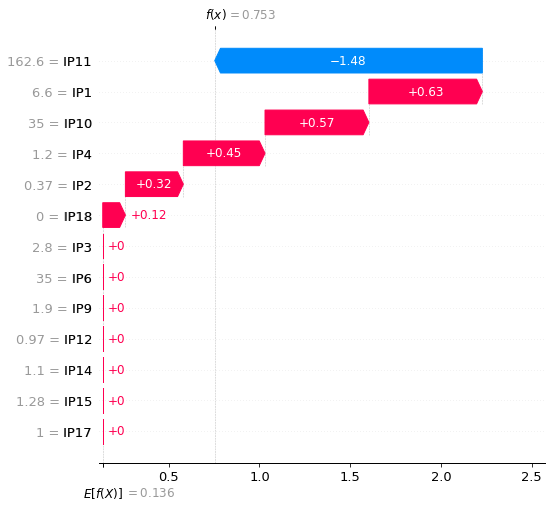

In [21]:
#Local plots
shap.plots.waterfall(shap_values[i], max_display=13)

### GET THE GLOBAL PLOT

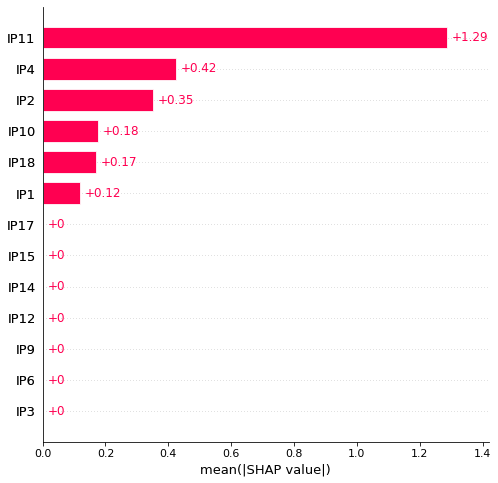

In [23]:
#Global Bar plots
shap.plots.bar(shap_values, max_display=17, show=False)

# Prepared by: 

#### Mr. KAUSHIK JAS, IITM, Chennai, Tamil Nadu, India

Contact: ce19d202@smail.iitm.ac.in OR kaushik.jas.2013@gmail.com

Website: https://sites.google.com/view/kaushikjasoffice3/home?authuser=0

### Cite this model as:
Jas, K., and Dodagoudar, G.R. (2023). "Explainable machine learning model for liquefaction potential assessment of soils using XGBoost-SHAP." Soil Dynamics and Earthquake Engineering.165:107662. https://doi.org/10.1016/j.soildyn.2022.107662.